In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
import os
import scipy
import statsmodels.api as sm
import numpy as np
import imageio.v2 as imageio
from amftrack.util.plot import gridplot


In [ ]:
path_general = r"/mnt/sun-temp/TEMP/Transport/TransportCUT/20221220_Plate505"

paths = [path for path in os.listdir(path_general)]

In [ ]:
kymos = [path+'_kymos' for path in paths]

In [ ]:
data_speed = pd.DataFrame()
for path in kymos:
    path_data = os.path.join(path_general,path,'speed_data.csv')
    if os.path.exists(path_data):
        data = pd.read_csv(path_data)
        data['path'] = path
        data_speed = pd.concat((data_speed,data))
data_speed['speed (um.s-1)']=data_speed['speed (um.s-1)']/4

In [ ]:
data_speed['unique_id'] = data_speed['edge']+data_speed['direction']+data_speed['path']

In [ ]:
plt.close('all')

In [ ]:
speeds = data_speed.groupby(['edge','direction','path'])["speed (um.s-1)"].mean()
speeds_std = data_speed.groupby(['edge','direction','path'])["speed (um.s-1)"].std()

In [ ]:
def make_stat(x0,ax):
    def statistic(x,y):
        X = sm.add_constant(x, prepend=False)
        model = sm.OLS(y,X)
        res = model.fit()
        a,b = res.params[0],res.params[1]
        ax.plot(x0,np.array(x0)*a+b,color = 'grey', alpha = 0.01)
        return(a)
    return(statistic)

In [ ]:
associations1 = {12:13,1:15}
for i in range(2,13):
    associations1[i]=i+15
associations2 = {12:28,
                1:29}
for i in range(2,13):
    associations2[i]=i+29

In [ ]:
paths_effect = data_speed['path'].unique()
fig,axs = gridplot(2*len(paths_effect),ncols = len(paths_effect)//2,subh = 5,subw = 7)
axs = list(axs)
for j in range(1,13):
    i = 3*j
    path = f"20221220_Plate505_0{j}_kymos" if j <10 else f"20221220_Plate505_{j}_kymos"
    path_data = os.path.join(path_general,path,'extraction.png')
    im = imageio.imread(path_data)
    select = data_speed.loc[data_speed['path']==path]
    ax =axs[2*i]
    ax.imshow(im)
    ax =axs[2*i+1]
    
    for edge in select['edge'].unique():
        sub_select = select.loc[select['edge']==edge]
        ax.plot(sub_select['time (s)'],sub_select['speed (um.s-1)'],label=edge)
    ax.set_ylabel('speed($\mu m.s^{-1}$)')
    ax.set_xlabel('time ($s$)')
    ax.legend()
    i = 3*j+1
    path = f"20221220_Plate505_{associations1[j]}_kymos" 
    path_data = os.path.join(path_general,path,'extraction.png')
    im = imageio.imread(path_data)
    select = data_speed.loc[data_speed['path']==path]
    ax =axs[2*i]
    ax.imshow(im)
    ax =axs[2*i+1]
    
    for edge in select['edge'].unique():
        sub_select = select.loc[select['edge']==edge]
        ax.plot(sub_select['time (s)'],sub_select['speed (um.s-1)'],label=edge)
    ax.set_ylabel('speed($\mu m.s^{-1}$)')
    ax.set_xlabel('time ($s$)')
    ax.legend()
    i = 3*j+2
    path = f"20221220_Plate505_{associations2[j]}_kymos" 
    path_data = os.path.join(path_general,path,'extraction.png')
    im = imageio.imread(path_data)
    select = data_speed.loc[data_speed['path']==path]
    ax =axs[2*i]
    ax.imshow(im)
    ax =axs[2*i+1]
    
    for edge in select['edge'].unique():
        sub_select = select.loc[select['edge']==edge]
        ax.plot(sub_select['time (s)'],sub_select['speed (um.s-1)'],label=edge)
    ax.set_ylabel('speed($\mu m.s^{-1}$)')
    ax.set_xlabel('time ($s$)')
    ax.legend()

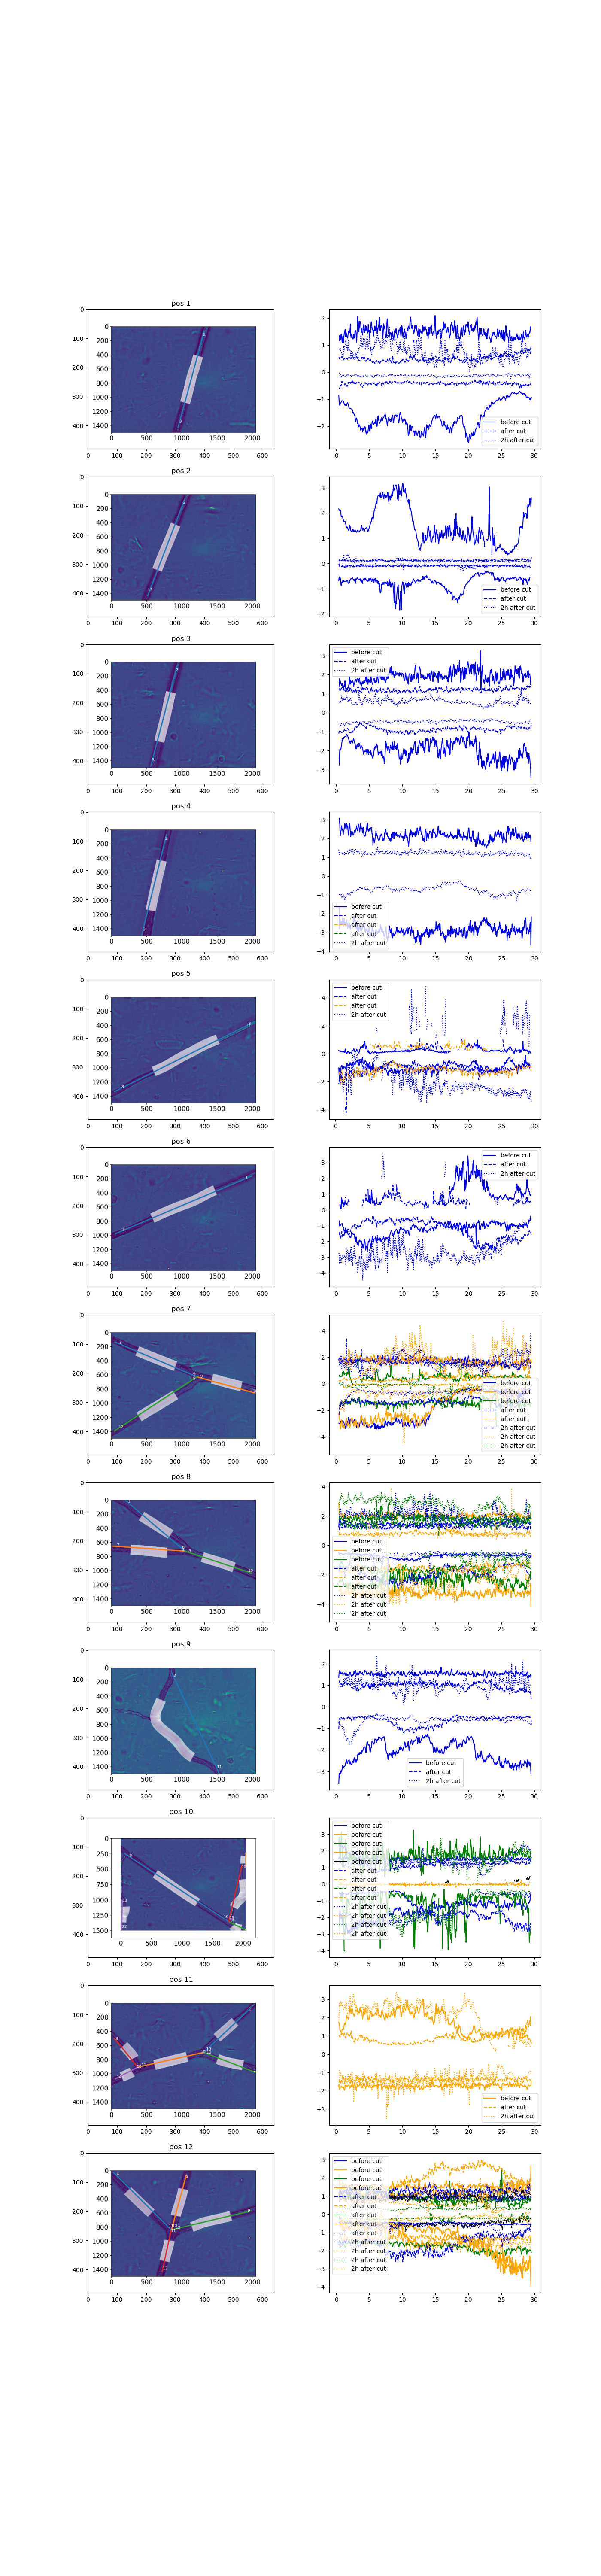

In [10]:
paths_effect = data_speed['path'].unique()
fig,axs = gridplot(2*12,ncols = 2,subh = 5,subw = 7)
axs = list(axs)
colors = ['blue','orange','green','orange','black','pink','purple','yellow','green','green']
for j in range(1,13):
    path = f"20221220_Plate505_0{j}_kymos" if j <10 else f"20221220_Plate505_{j}_kymos"
    
    i = j
    path_data = os.path.join(path_general,path,'extraction.png')
    im = imageio.imread(path_data)
    select = data_speed.loc[data_speed['path']==path]
    ax =axs[2*i-2]
    ax.imshow(im)
    ax.set_title(f'pos {j}')
    ax =axs[2*i-1]
    
    select = data_speed.loc[data_speed['path']==path]
    plot_bool = j!=11
    for k,edge in enumerate(select['edge'].unique()):
        sub_select = select.loc[select['edge']==edge]
        if plot_bool or k==1:
            ax.plot(sub_select['time (s)'],sub_select['speed (um.s-1)'],label=f'before cut',color = colors[k],linestyle='-')
    path = f"20221220_Plate505_{associations1[j]}_kymos" 
    select = data_speed.loc[data_speed['path']==path]  
    for k,edge in enumerate(select['edge'].unique()):
        sub_select = select.loc[select['edge']==edge]
        if plot_bool or k==1:
            ax.plot(sub_select['time (s)'],sub_select['speed (um.s-1)'],label=f'after cut',color = colors[k],linestyle='dashed')
    path = f"20221220_Plate505_{associations2[j]}_kymos" 
    select = data_speed.loc[data_speed['path']==path]  
    for k,edge in enumerate(select['edge'].unique()):
        sub_select = select.loc[select['edge']==edge]
        if plot_bool or k==1:
            ax.plot(sub_select['time (s)'],sub_select['speed (um.s-1)'],label=f'2h after cut',color = colors[k],linestyle='dotted')
    ax.legend()

In [ ]:
paths_effect = data_speed['path'].unique()
fig,axs = gridplot(2*len(paths_effect),ncols = len(paths_effect)//2,subh = 5,subw = 7)
axs = list(axs)
for i,path in enumerate(paths_effect):
    
    path_data = os.path.join(path_general,path,'extraction.png')
    im = imageio.imread(path_data)
    select = data_speed.loc[data_speed['path']==path]
    ax =axs[2*i]
    ax.imshow(im)
    ax =axs[2*i+1]
    
    for edge in select['edge'].unique():
        sub_select = select.loc[select['edge']==edge]
        ax.plot(sub_select['time (s)'],sub_select['speed (um.s-1)'],label=edge)
    ax.set_ylabel('speed($\mu m.s^{-1}$)')
    ax.set_xlabel('time ($s$)')
    ax.legend()

In [ ]:
fig,ax = plt.subplots()
xs =[]
ys = []
for edge,direction,path in speeds.index:
    if direction=='root':
        x = speeds[(edge,direction,path)]
        y = speeds[(edge,"tip",path)]
        if not np.isnan(x) and not np.isnan(y) and x >=-5 and x <=-1.5:
            xs.append(x)
            ys.append(y)

ax.scatter(xs,ys)
# ax.set_xlim(0,-3)  
data = np.array((xs,ys))
n_resamples=1000
statistic = make_stat(xs,ax)
std = scipy.stats.bootstrap(data,statistic,
                            vectorized = False,
                            method="basic",
                            n_resamples = n_resamples,
                            paired= True).standard_error
X = sm.add_constant(xs, prepend=False)
model = sm.OLS(ys,X)
res = model.fit()
a,b = res.params[0],res.params[1]
ax.plot(xs,np.array(xs)*a+b,label = f"linear fit : coef = {round(a,1)}$\pm$ {round(std,1)}$\mu m.mm^{-3}$",color="black")
plt.legend()
ax.set_xlabel('speed to the root $(\mu m.s^{-1})$')
ax.set_ylabel('speed to the tip $(\mu m.s^{-1})$')

In [ ]:
fig,ax = plt.subplots()
ax.hist(xs,8)
ax.hist(ys,8)
ax.set_xlabel('speed $(\mu m.s^{-1})$')


In [ ]:
fig,ax = plt.subplots()
ax.hist(np.array(ys)/np.array(xs),20)
# ax.hist(ys,8)

In [ ]:
np.median(np.array(ys)/np.array(xs))

In [ ]:
fig,ax = plt.subplots()
xs =[]
ys = []
for edge,direction,path in speeds.index:
    if direction=='root':
        x = speeds_std[(edge,direction,path)]
        y = speeds_std[(edge,"tip",path)]
        if not np.isnan(x) and not np.isnan(y) and x >=-3.3:
            xs.append(x)
            ys.append(y)

ax.scatter(xs,ys)
plt.legend()
ax.set_xlabel('speed to the root $(\mu m.s^{-1})$')
ax.set_ylabel('speed to the tip $(\mu m.s^{-1})$')

In [ ]:
np.median(xs),np.median(ys)

In [ ]:
np.std(xs)/np.sqrt(len(xs)),np.std(ys)/np.sqrt(len(ys))

In [ ]:
for path in data_speed['path'].unique():
    fig,ax = plt.subplots()
    select = data_speed.loc[data_speed['path']==path]
    for edge in select['edge'].unique():
        sub_select = select.loc[select['edge']==edge]
        ax.plot(sub_select['time (s)'],sub_select['speed (um.s-1)'])

In [ ]:
value_4x = []
value_50x = []



In [ ]:
num = 48
path = f'20221027_plate452_0{num}_kymos'
select = data_speed.loc[data_speed['path']==path]
edges = [(16,10)]
edges = [str(edge) for edge in edges]
sub_select = select.loc[select['edge'].isin(edges)]
sub_select = sub_select.loc[sub_select['direction']=="root"]

value_4x.append(-np.nanmean(sub_select['speed (um.s-1)']))

In [ ]:
value_4x = np.load("values_4x.npy").tolist()
value_50x = np.load("values_50x.npy").tolist()

In [ ]:
num = 50
path = f'20221027_plate452_0{num}_kymos'
select = data_speed.loc[data_speed['path']==path]
edges = [(1837,1417)]
edges = [str(edge) for edge in edges]
sub_select = select.loc[select['edge'].isin(edges)]
sub_select = sub_select.loc[sub_select['direction']=="root"]

value_50x.append(-np.nanmean(sub_select['speed (um.s-1)']))

In [ ]:
np.save("values_50x",value_50x)

In [ ]:
np.save("values_4x",value_4x)

In [ ]:
fig,ax = plt.subplots()
ax.scatter(value_4x,value_50x)
ax.plot(value_4x,value_4x)
ax.set_xlabel('4x speed (um.s-1)')
ax.set_ylabel('50x speed (um.s-1)')

In [ ]:
nums = [19]
for num in nums:
    path = f'20221027_plate452_0{num}_kymos'
    path_data = os.path.join(path_general,path,'extraction.png')
    im = imageio.imread(path_data)
    select = data_speed.loc[data_speed['path']==path]
    fig,ax = plt.subplots()
    ax.imshow(im)
    fig,ax = plt.subplots()
    
    for edge in select['edge'].unique():
        sub_select = select.loc[select['edge']==edge]
        ax.plot(sub_select['time (s)'],sub_select['speed (um.s-1)'],label=edge)
    plt.legend()

In [ ]:
select = data_speed.loc[~data_speed['width'].isna()]
for path in select['path'].unique():
    fig,ax = plt.subplots()
    selection = select.loc[select['path']==path]
    selection = selection.loc[selection['direction']=='tip']
    speed = selection.groupby('unique_id')['speed (um.s-1)'].mean()
    width = selection.groupby('unique_id')['width'].mean()
    ax.scatter(width,speed)

In [ ]:
num = 54
fig,ax=plt.subplots()
path = f'20221027_plate452_0{num}_kymos'
path_data = os.path.join(path_general,path,'extraction.png')
im = imageio.imread(path_data)
select = data_speed.loc[data_speed['path']==path]
ax.imshow(im)
fig,ax=plt.subplots()

for edge in select['edge'].unique():
    sub_select = select.loc[select['edge']==edge]
    ax.plot(sub_select['time (s)'],sub_select['speed (um.s-1)'],label=edge)
ax.set_ylabel('speed($\mu m.s^{-1}$)')
ax.set_xlabel('time ($s$)')
ax.legend()



In [ ]:
edge = 118,142
path_kymo = os.path.join(path_general,path,f'{edge}kymo.npy')
kymo = np.load(path_kymo)
fig,ax=plt.subplots()
ax.imshow(kymo)
path_kymo = os.path.join(path_general,path,f'{edge}kymo_right.npy')
kymo = np.load(path_kymo)
fig,ax=plt.subplots()
ax.imshow(kymo)
path_kymo = os.path.join(path_general,path,f'{edge}kymo_left.npy')
kymo = np.load(path_kymo)
fig,ax=plt.subplots()
ax.imshow(kymo)
fig,ax=plt.subplots()

sub_select = select.loc[select['edge']==str(edge)]
ax.plot(sub_select['time (s)'],sub_select['speed (um.s-1)'],label=edge)